In [2]:
# Codice per clonare la repository di github con tutti i dati. Va eseguito una sola volta
# (per questo si controlla se la cartella esista già o meno)
# È stato scelto questo metodo per permettere a tutti, sia da google colab che in locale,
# di avere i dati a disposizione

# Se si esegue in locale, assicurarsi di avere git installato
# Al link della repository sono visionabili tutti i file
from os import path
if not path.exists("Laboratorio_Fisica_3"):
    !git clone https://github.com/MasterRoby3/Laboratorio_Fisica_3

# Per comodità si definisce una variabile che sia la radice di tutti i percorsi utilizzati, in modo da alleggerire il codice successivo
rad = "Laboratorio_Fisica_3/Diffrazione/"

# In questa prima cella si importano anche le librerie necessarie:
import numpy as np
from scipy import optimize as sop
from scipy import constants as scc
import matplotlib.pyplot as plt
import pandas as pd

#Altri dati utili per i plot
titlefontsize, labelfontsize, tickfontsize=20, 16, 14
markersize, linewidth = 6, 1

# Diffrazione
In quest'esperienza si vuole studiare il fenomeno della diffrazione della luce attraverso singola fenditura e doppia fenditura. L'apparato sperimentale consiste nell'utilizzare un laser come sorgente luminosa (rosso e verde), allineando il raggio luminoso con le fenditure. Con l'ausilio di un foglio a quadretti sul muro si segnano le posizioni dei minimi e si procede poi a misurare la distanza tra i minimi con un righello. È importante mantenere fissa la distanza tra le fenditure e il muro durante l'acquisizione di una serie di misure.

L'esperienza si divide in due parti:
* diffrazione attraverso singola fenditura
* diffrazione attraverso doppia fenditura

Un'immagine esemplificativa di una misura con singola fenditura è riportata di seguito (in questa esperienza lo "schermo" corrisponde col muro).

<br><center><img src="Laboratorio_Fisica_3/Diffrazione/img/sing_fend.jpg" /></center><br>



## Parte 1: diffrazione attraverso singola fenditura
In questa parte dell'esperienza si è proceduto ad analizzare la figura di diffrazione prodotta da 5 fenditure singole di larghezze diverse (sia con laser rosso che con laser verde). L'obiettivo è ricavare la larghezza della fenditura da un fit lineare sfruttando la relazione per i minimi di diffrazione:
$$b \sin\vartheta = \pm p\lambda$$ dove $b$ è la larghezza della fenditura, $\vartheta$ l'angolo, $\lambda$ la lunghezza d'onda e p l'ordine di diffrazione.

I laser utilizzati hanno lunghezze d'onda note, in particolare $\lambda = 633\ nm$ il rosso e $\lambda = 532\ nm$ il verde. Conoscendo la distanza tra due minimi $d$, si può calcolare l'angolo secondo la relazione
$$\vartheta = \arctan\left(\frac{d}{2r}\right)$$ dove $r$ è la distanza delle fenditure dal muro (tenuta fissa a $r=230\ cm$ per il laser rosso e $r=270\ cm$ per il verde). Il fattore 2 a denominatore è necessario perché si vuole trovare l'angolo rispetto all'orizziontale (come in figura), quindi bisogna considerare la distanza del minimo dal centro della figura di diffrazione.

Per concludere, si vuole confrontare il valore della larghezza della fenditura così ricavato con quello di riferimento indicato dal produttore. Vengono riportati di seguito i grafici relativi ai fit e una tabella riassuntiva dei valori trovati.

In [9]:
# Si vuole fittare il valore di b in sin(theta) = p * lambda / b
# di seguito la funzione di fit
def diffr(p, b, lungh_onda):
    return  p * lungh_onda / b

# Funzione utile per il calcolo dell'R^2
def r_squared(actual, predicted):
    residuals = actual - predicted
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum( (actual - np.mean(actual))**2 )
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

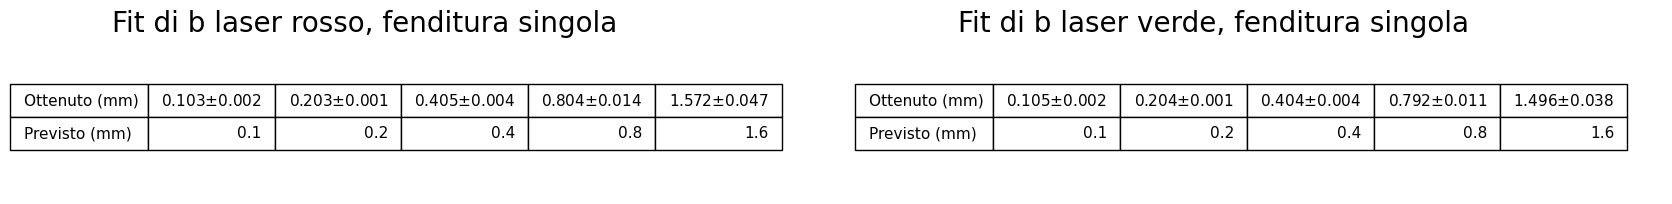

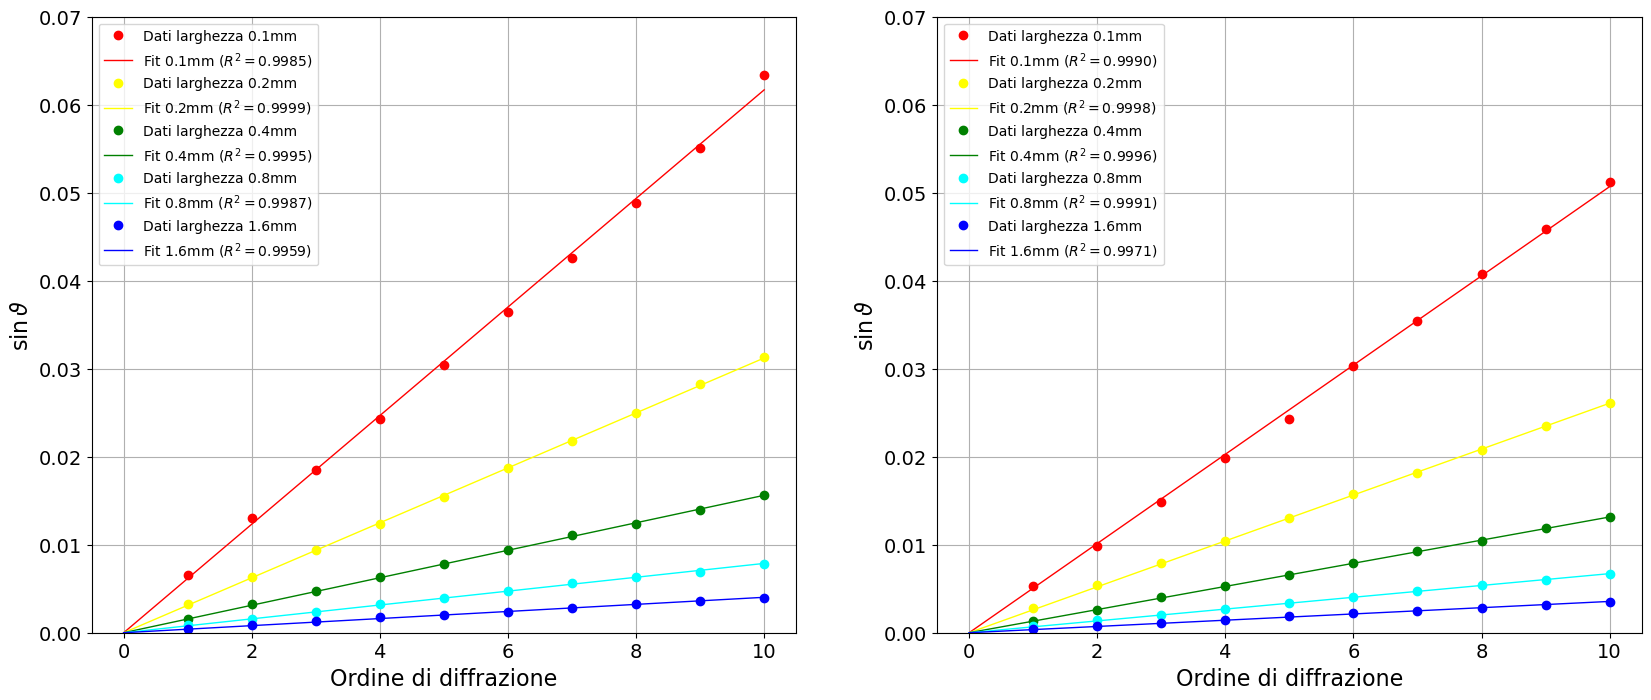

In [138]:
# Definizione di quantità fissate utili
r_rosso = 230   # in cm
r_verde = 270   # in cm
# lunghezze d'onda in millimetri, si usa questa unità di misura perché la larghezza della fenditura è espressa in millimetri
lambda_rosso = 633e-6  # in mm
lambda_verde = 532e-6 # in mm

# Lettura dati da csv
data_rosso = pd.read_csv(rad + "data/1fend_rosso.csv")
data_verde = pd.read_csv(rad + "data/1fend_verde.csv")

p = data_rosso["p"].to_numpy()
# I dati relativi alle distanze dei minimi si immagazzinano in una matrice numpy
d_rosso = data_rosso[["d_1", "d_2", "d_3", "d_4", "d_5"]].T.values
d_verde = data_verde[["d_1", "d_2", "d_3", "d_4", "d_5"]].T.values

# Si fanno di seguito i calcoli per ottenere il seno
sin_rosso = np.sin( np.arctan( (d_rosso/2) / r_rosso) )
sin_verde = np.sin( np.arctan( (d_verde/2) / r_verde) )

# Si definiscono i vettori per salvare i risultati del fit, sono della forma
# [b, std_dev di b, R^2] per ogni fenditura
# Si raggruppano in matrici in base al colore del laser
results_rosso = np.zeros((5,3))
results_verde = np.zeros((5,3))

# Ci sono vari fit da fare, si cicla sulla matrice contenente i dati sul seno dell'angolo (laser rosso)
for index, sin_vec in enumerate(sin_rosso):
    # Si effettua ora il fit lineare per il parametro b
    # dato che la lunghezza d'onda è fissata, similmente a quanto fatto in altre relazioni, si usa una lambda function
    popt, pcov = sop.curve_fit(lambda p, b: diffr(p, b, lambda_rosso), p, sin_vec)
    b = popt[0]
    ndata = len(sin_vec)
    # Si calcola la deviazione standard
    sigma = np.sqrt(ndata*np.diag(pcov))
    r_sq = r_squared(sin_vec, diffr(p, b, lambda_rosso))

    # Salvataggio dei risultati di fit
    results_rosso[index] = np.array([b, sigma[0], r_sq])

    # Stampa dei risultati per controllo
    # print('Valore fittato per la larghezza della fenditura b=', "{:.3g}".format(b), 'mm deviazione standard=',"{:.3g}".format(sigma[0]), 'mm')
    # print("R^2 = ", "{:.5g}".format(r_sq))

# Ci sono vari fit da fare, si cicla sulla matrice contenente i dati sul seno dell'angolo (laser verde)
for index, sin_vec in enumerate(sin_verde):
    # Si effettua ora il fit lineare per il parametro b
    # dato che la lunghezza d'onda è fissata, similmente a quanto fatto in altre relazioni, si usa una lambda function
    popt, pcov = sop.curve_fit(lambda p, b: diffr(p, b, lambda_verde), p, sin_vec)
    b = popt[0]
    ndata = len(sin_vec)
    # Si calcola la deviazione standard
    sigma = np.sqrt(ndata*np.diag(pcov))
    r_sq = r_squared(sin_vec, diffr(p, b, lambda_verde))

    # Salvataggio dei risultati di fit
    results_verde[index] = np.array([b, sigma[0], r_sq])

    # Stampa dei risultati per controllo
    # print('Valore fittato per la larghezza della fenditura b=', "{:.3g}".format(b), 'mm deviazione standard=',"{:.3g}".format(sigma[0]), 'mm')
    # print("R^2 = ", "{:.5g}".format(r_sq))

# Si definisce un vettore con le larghezze delle fenditure previste
previsto = [0.1,0.2,0.4,0.8,1.6]

# Si definisce infine un vettore per mappare i 5 colori da utilizzare per i 5 fit
colors = ["red", "yellow", "green", "cyan", "blue"]

fig, axs = plt.subplots(1, 2, figsize=[20,2])

axs[0].set_title("Fit di b laser rosso, fenditura singola", size=titlefontsize, loc="left")
axs[0].axis('tight')
axs[0].axis('off')
rows = ["Ottenuto (mm)", "Previsto (mm)"]
table_data = [
    ["{:.3f}".format(arr[0]) + r"$\pm$" + "{:.3f}".format(arr[1]) for arr in results_rosso],
    previsto
]
table = axs[0].table(cellText=table_data, rowLabels=rows, loc='center')
table.set_fontsize(14)
table.scale(0.9, 2)

axs[1].set_title("Fit di b laser verde, fenditura singola", size=titlefontsize, loc="left")
axs[1].axis('tight')
axs[1].axis('off')
rows = ["Ottenuto (mm)", "Previsto (mm)"]
table_data = [
    ["{:.3f}".format(arr[0]) + r"$\pm$" + "{:.3f}".format(arr[1]) for arr in results_verde],
    previsto
]
table = axs[1].table(cellText=table_data, rowLabels=rows, loc='center')
table.set_fontsize(14)
table.scale(0.9, 2)


fig2, axs2 = plt.subplots(1, 2, figsize=[20,8])
p_fit = np.arange(0.,10.2,0.2)
for index, sin_vec in enumerate(sin_rosso):
    axs2[0].plot(p, sin_vec, 'o', markersize=markersize, label="Dati larghezza "+str(previsto[index])+"mm", color=colors[index])
    axs2[0].plot(p_fit, diffr(p_fit, results_rosso[index, 0], lambda_rosso), linewidth=linewidth, label="Fit "+str(previsto[index])+"mm"+" ($R^2=${:.4f})".format(results_rosso[index, 2]), color=colors[index])

axs2[0].set_xlabel('Ordine di diffrazione', size=labelfontsize)
axs2[0].set_ylabel(r'$\sin\vartheta$', size=labelfontsize)
axs2[0].set_ylim(0.,0.07)
axs2[0].tick_params(labelsize=tickfontsize)
axs2[0].grid(True)
axs2[0].legend()

for index, sin_vec in enumerate(sin_verde):
    axs2[1].plot(p, sin_vec, 'o', markersize=markersize, label="Dati larghezza "+str(previsto[index])+"mm", color=colors[index])
    axs2[1].plot(p_fit, diffr(p_fit, results_verde[index, 0], lambda_verde), linewidth=linewidth, label="Fit "+str(previsto[index])+"mm"+" ($R^2=${:.4f})".format(results_verde[index, 2]), color=colors[index])

axs2[1].set_xlabel('Ordine di diffrazione', size=labelfontsize)
axs2[1].set_ylabel(r'$\sin\vartheta$', size=labelfontsize)
axs2[1].set_ylim(0.,0.07)
axs2[1].tick_params(labelsize=tickfontsize)
axs2[1].grid(True)
axs2[1].legend();

Come si può facilmente vedere dalle tabelle riportate sopra, si sono ottenuti ottimi risultati per la stima della larghezza delle fenditure. L'unico dato leggermente impreciso è quello per la fenditura più grande per il laser verde: questo può essere dovuto a vari fattori, molto probabilmente la causa è un errore di misura dato dalla grande vicinanza dei minimi.

Una possibile obiezione è che in alcuni casi la deviazione standard sia troppo bassa e non ci sia coerenza con i valori aspettati; una delle possibili cause è che, essendo i minimi di diffrazione non definiti precisamente (ma avendo ciascuno di essi un certo intervallo di incertezza), potrebbe essere stato involontariamente introdotto un lieve shift in una direzione dall'operatore. Nonostante ciò, i valori ottenuti sono da considerarsi ottimi.

## Parte 2: fenditura doppia
Per questa parte dell'esperienza le condizioni sono le stesse della prima, solo che si utilizza una doppia fenditura al posto che una fenditura singola. Oltre alla larghezza delle fenditure, legata alla distanza dei minimi di diffrazione (come visto nella prima parte), assume un ruolo importante anche la spaziatura tra le fenditure $d$, la quale determina altri minimi più ravvicinati per interferenza tra le fonti luminose delle due fenditure. Questi zeri sono dati dalla relazione:
$$d \sin\vartheta = \pm \left(m + \frac{1}{2}\right)\lambda$$
Verranno effettuate diverse misure su:
- 1 set da 3 doppie fenditure a spaziatura fissa $d=0.3\ mm$ e larghezza variabile
- 1 set da 4 doppie fenditure a larghezza fissa $b=0.15\ mm$ e spaziatura variabile

#### Parte 2.1: doppie fenditure a spaziatura fissa e larghezza variabile

Si procede similmente a quanto fatto nella parte 1, solo che ora si devono analizzare sia i minimi dovuti alla diffrazione sia quelli dovuti all'interferenza delle sorgenti delle due fenditure. Si inizia quindi analizzando questi ultimi: verrà fatto una sola volta per questa sezione, dato che, rimanendo $d$ fissa, si troverebbero risultati molto simili (se non identici; sarebbe come ripetere le misure). Si procede poi stimando la larghezza delle fenditure, che è variabile; similmente a quanto fatto nella parte 1, verrà riportata una tabella riassuntiva con i risultati ottenuti e quelli previsti.

In [107]:
# Funzione di fit minimi d'interferenza dalle 2 fenditure
# Nei file è stato già salvato il dato per m+1/2, quindi per "m" in questa funzione si intenderà tutto m+1/2
# La funzione in realtà è formalmente identica a "diffr", si ridefinisce solo per rendere più leggibile il codice che la utilizza
def interf(m, d, lungh_onda):
    return m * lungh_onda / d

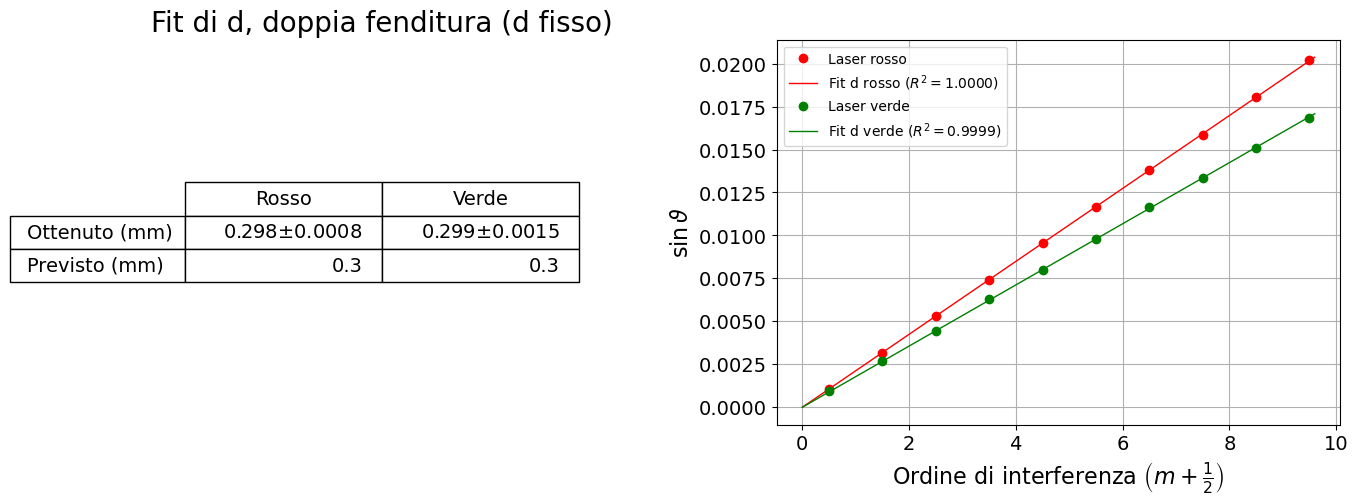

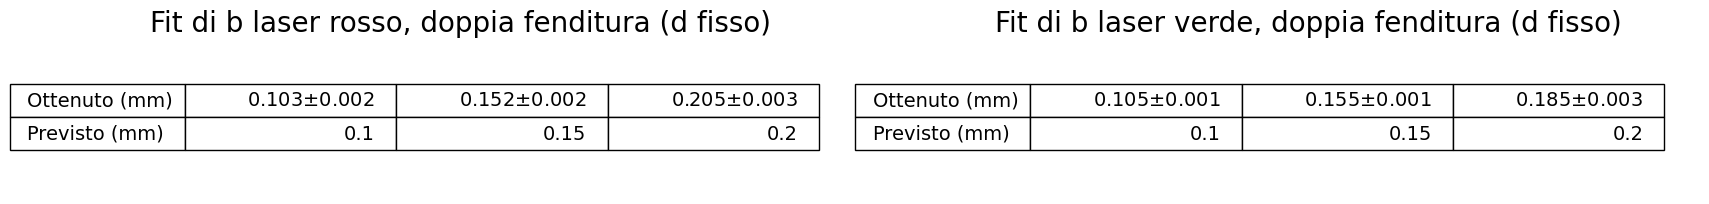

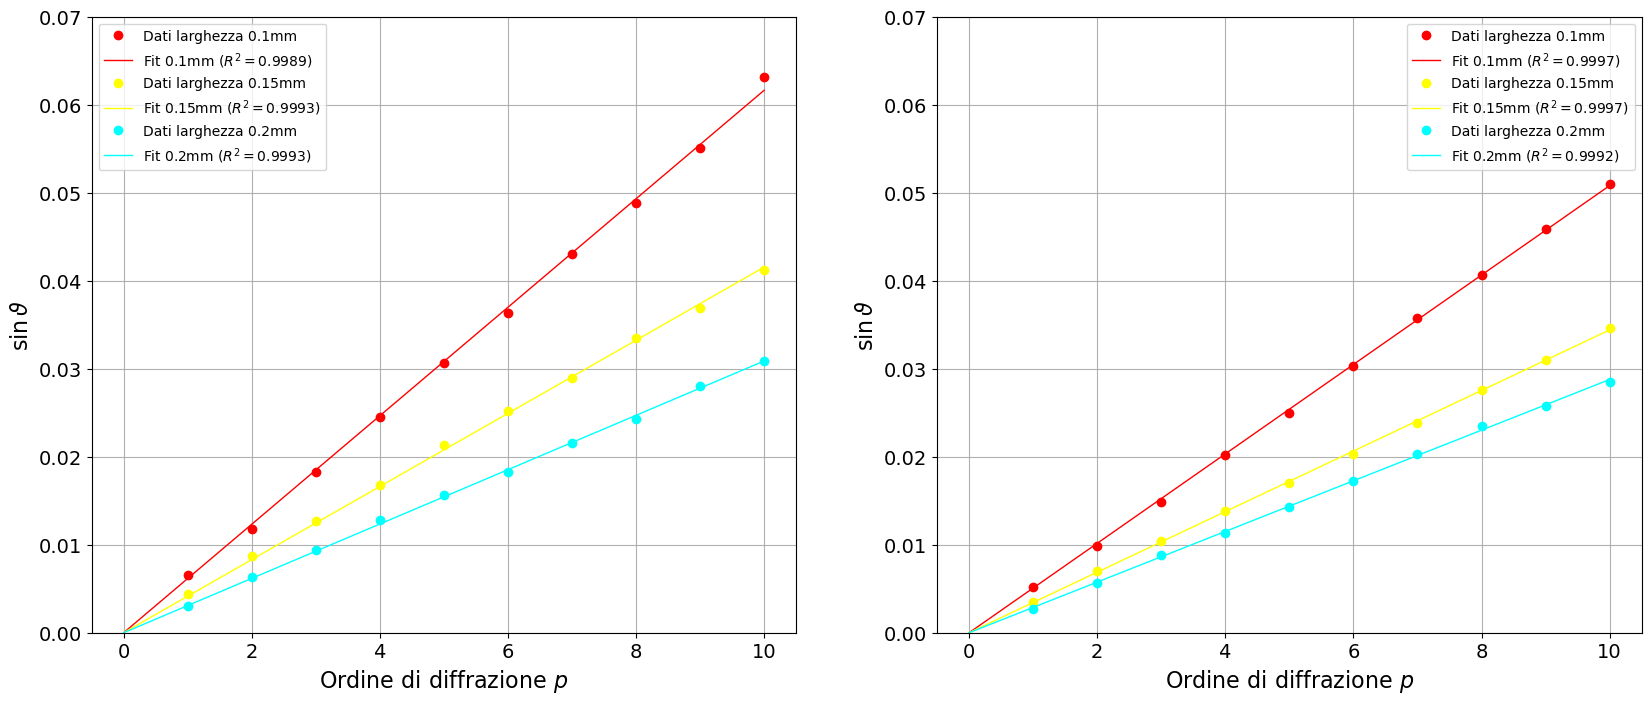

In [134]:
# NOTA: le lunghezze d'onda (lambda) e le distanze delle fenditure dal muro (r) sono già fissate dalla parte precedente

# Lettura dati da csv
data_rosso = pd.read_csv(rad + "data/2fend_dfissa_rosso.csv")
data_verde = pd.read_csv(rad + "data/2fend_dfissa_verde.csv")

p = data_rosso["p"].to_numpy()
m = data_rosso["m"].to_numpy()

# dati relativi alle distanze dei minimi dovuti alla spaziatura, si indicano con dist_m
dist_m_rosso = data_rosso["dist_m"].to_numpy()
dist_m_verde = data_verde["dist_m"].to_numpy()

# dati relativi alle distanze dei minimi dovuti alla diffrazione, si indicano con dist_p
dist_p_rosso = data_rosso[["dist_p_1", "dist_p_2", "dist_p_3"]].T.values
dist_p_verde = data_verde[["dist_p_1", "dist_p_2", "dist_p_3"]].T.values


# Si fanno di seguito i calcoli per ottenere il seno
sin_m_rosso = np.sin( np.arctan( (dist_m_rosso/2) / r_rosso) )
sin_m_verde = np.sin( np.arctan( (dist_m_verde/2) / r_verde) )
sin_p_rosso = np.sin( np.arctan( (dist_p_rosso/2) / r_rosso) )
sin_p_verde = np.sin( np.arctan( (dist_p_verde/2) / r_verde) )


# Si definiscono i vettori per salvare i risultati del fit, sono della forma
# Essendo che d è fisso, sarà salvato in un solo vettore, mentre b, che varia, sarà salvato in matrici
# [b, std_dev di b, R^2] per ogni fenditura
# Si raggruppano in matrici in base al colore del laser
d_fit_rosso = np.zeros(3)
d_fit_verde = np.zeros(3)
b_fit_rosso = np.zeros((3,3))
b_fit_verde = np.zeros((3,3))


# Si effettua ora il fit lineare per il parametro d, sia in caso di laser rosso che laser verde

# Caso rosso
# dato che la lunghezza d'onda è fissata, similmente a quanto fatto in altre relazioni, si usa una lambda function
popt, pcov = sop.curve_fit(lambda m, d: interf(m, d, lambda_rosso), m, sin_m_rosso)
d = popt[0]
ndata = len(sin_m_rosso)
# Si calcola la deviazione standard
sigma = np.sqrt(ndata*np.diag(pcov))
r_sq = r_squared(sin_m_rosso, interf(m, d, lambda_rosso))
# Salvataggio dei risultati di fit
d_fit_rosso = np.array([d, sigma[0], r_sq])

# Caso verde (la procedura è identica a sopra, quindi si tolgono i commenti e si snellisce il codice
popt, pcov = sop.curve_fit(lambda m, d: interf(m, d, lambda_verde), m, sin_m_verde)
d = popt[0]
sigma = np.sqrt(len(sin_m_verde)*np.diag(pcov))
r_sq = r_squared(sin_m_verde, interf(m, d, lambda_verde))
d_fit_verde = np.array([d, sigma[0], r_sq])

# Si fanno una tabella e un plot per riassumere questi primi risultati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,5])

ax1.set_title("Fit di d, doppia fenditura (d fisso)", size=titlefontsize)
ax1.axis('tight')
ax1.axis('off')
rows = ["Ottenuto (mm)", "Previsto (mm)"]
cols = ["Rosso", "Verde"]
table_data = [
    ["{:.3f}".format(arr[0]) + r"$\pm$" + "{:.4f}".format(arr[1]) for arr in [d_fit_rosso[0:2], d_fit_verde[0:2]]],
    [0.3, 0.3]
]
table = ax1.table(cellText=table_data, rowLabels=rows, colLabels=cols, loc='center')
table.set_fontsize(14)
table.scale(0.7, 2)

m_fit = np.arange(0.,9.7,0.2)
ax2.plot(m, sin_m_rosso, 'o', markersize=markersize, color="red", label="Laser rosso")
ax2.plot(m_fit, interf(m_fit, d_fit_rosso[0], lambda_rosso), linewidth=linewidth, color="red", label="Fit d rosso ($R^2=${:.4f})".format(d_fit_rosso[2]) )
ax2.plot(m, sin_m_verde, 'o', markersize=markersize, color="green", label="Laser verde")
ax2.plot(m_fit, interf(m_fit, d_fit_verde[0], lambda_verde), linewidth=linewidth, color="green", label="Fit d verde ($R^2=${:.4f})".format(d_fit_verde[2]) )
ax2.set_xlabel(r'Ordine di interferenza $\left(m+\frac{1}{2}\right)$', size=labelfontsize)
ax2.set_ylabel(r'$\sin\vartheta$', size=labelfontsize)
ax2.tick_params(labelsize=tickfontsize)
ax2.grid(True)
ax2.legend()


# Si passa ora a fare i fit per i valori di p
# Essendo la procedura molto simile a ciò fatto nella parte 1, si utilizzeranno meno commenti al fine di snellire il codice e renderlo più compatto
for index, sin_vec in enumerate(sin_p_rosso):
    # Fit lineare per b
    popt, pcov = sop.curve_fit(lambda p, b: diffr(p, b, lambda_rosso), p, sin_vec)
    b = popt[0]
    sigma = np.sqrt(len(sin_vec)*np.diag(pcov))
    r_sq = r_squared(sin_vec, diffr(p, b, lambda_rosso))
    b_fit_rosso[index] = np.array([b, sigma[0], r_sq])

for index, sin_vec in enumerate(sin_p_verde):
    popt, pcov = sop.curve_fit(lambda p, b: diffr(p, b, lambda_verde), p, sin_vec)
    b = popt[0]
    sigma = np.sqrt(len(sin_vec)*np.diag(pcov))
    r_sq = r_squared(sin_vec, diffr(p, b, lambda_verde))
    b_fit_verde[index] = np.array([b, sigma[0], r_sq])

# Si definiscono i vettori delle larghezze previste e dei colori da utilizzare
previsto = [0.1, 0.15, 0.2]
colors = ["red", "yellow","cyan"]

fig, axs = plt.subplots(1, 2, figsize=[20,2])

axs[0].set_title("Fit di b laser rosso, doppia fenditura (d fisso)", size=titlefontsize, loc="left")
axs[0].axis('tight')
axs[0].axis('off')
rows = ["Ottenuto (mm)", "Previsto (mm)"]
table_data = [
    ["{:.3f}".format(arr[0]) + r"$\pm$" + "{:.3f}".format(arr[1]) for arr in b_fit_rosso],
    previsto
]
table = axs[0].table(cellText=table_data, rowLabels=rows, loc='center')
table.set_fontsize(14)
table.scale(0.9, 2)

axs[1].set_title("Fit di b laser verde, doppia fenditura (d fisso)", size=titlefontsize, loc="left")
axs[1].axis('tight')
axs[1].axis('off')
rows = ["Ottenuto (mm)", "Previsto (mm)"]
table_data = [
    ["{:.3f}".format(arr[0]) + r"$\pm$" + "{:.3f}".format(arr[1]) for arr in b_fit_verde],
    previsto
]
table = axs[1].table(cellText=table_data, rowLabels=rows, loc='center')
table.set_fontsize(14)
table.scale(0.9, 2)

fig2, axs2 = plt.subplots(1, 2, figsize=[20,8])
p_fit = np.arange(0.,10.2,0.2)
for index, sin_vec in enumerate(sin_p_rosso):
    axs2[0].plot(p, sin_vec, 'o', markersize=markersize, label="Dati larghezza "+str(previsto[index])+"mm", color=colors[index])
    axs2[0].plot(p_fit, diffr(p_fit, b_fit_rosso[index, 0], lambda_rosso), linewidth=linewidth, label="Fit "+str(previsto[index])+"mm"+" ($R^2=${:.4f})".format(b_fit_rosso[index, 2]), color=colors[index])

axs2[0].set_xlabel('Ordine di diffrazione $p$', size=labelfontsize)
axs2[0].set_ylabel(r'$\sin\vartheta$', size=labelfontsize)
axs2[0].set_ylim(0.,0.07)
axs2[0].tick_params(labelsize=tickfontsize)
axs2[0].grid(True)
axs2[0].legend()

for index, sin_vec in enumerate(sin_p_verde):
    axs2[1].plot(p, sin_vec, 'o', markersize=markersize, label="Dati larghezza "+str(previsto[index])+"mm", color=colors[index])
    axs2[1].plot(p_fit, diffr(p_fit, b_fit_verde[index, 0], lambda_verde), linewidth=linewidth, label="Fit "+str(previsto[index])+"mm"+" ($R^2=${:.4f})".format(b_fit_verde[index, 2]), color=colors[index])

axs2[1].set_xlabel('Ordine di diffrazione $p$', size=labelfontsize)
axs2[1].set_ylabel(r'$\sin\vartheta$', size=labelfontsize)
axs2[1].set_ylim(0.,0.07)
axs2[1].tick_params(labelsize=tickfontsize)
axs2[1].grid(True)
axs2[1].legend();

Come per la parte 1, i dati hanno ottimo accordo con i dati previsti; le conclusioni sui possibili errori sono analoghe, quindi si rimanda alla trattazione riportata in seguito ai risultati della parte 1.

#### Parte 2.2: doppie fenditure a larghezza fissa e spaziatura variabile
Si procede in maniera esattamente analoga rispetto al punto precedente, questa volta riportando una sola stima della larghezza $b$ (che rimane fissa), mentre si riportano le stime dei 4 valori di $d$ delle coppie di fenditure utilizzate.

Di seguito il codice per produrre le tabelle e i grafici riassuntivi.

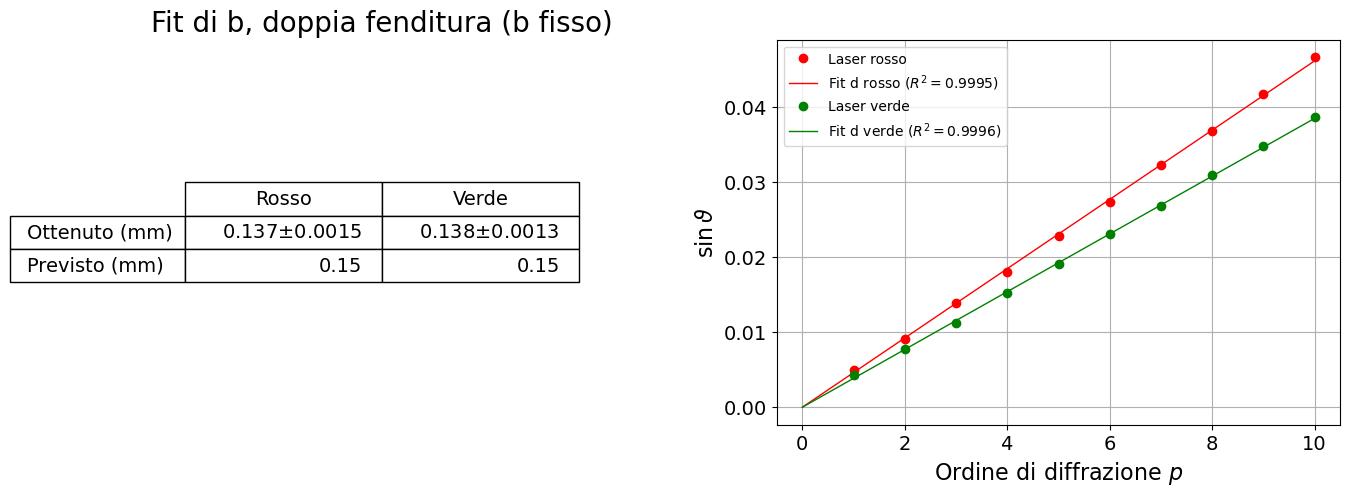

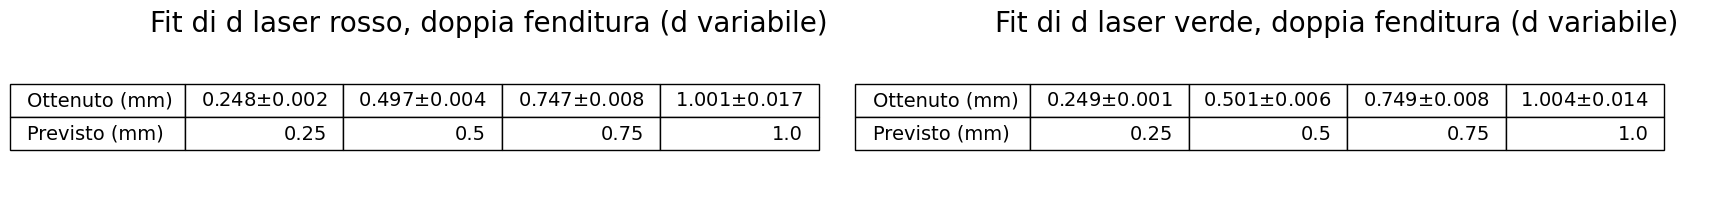

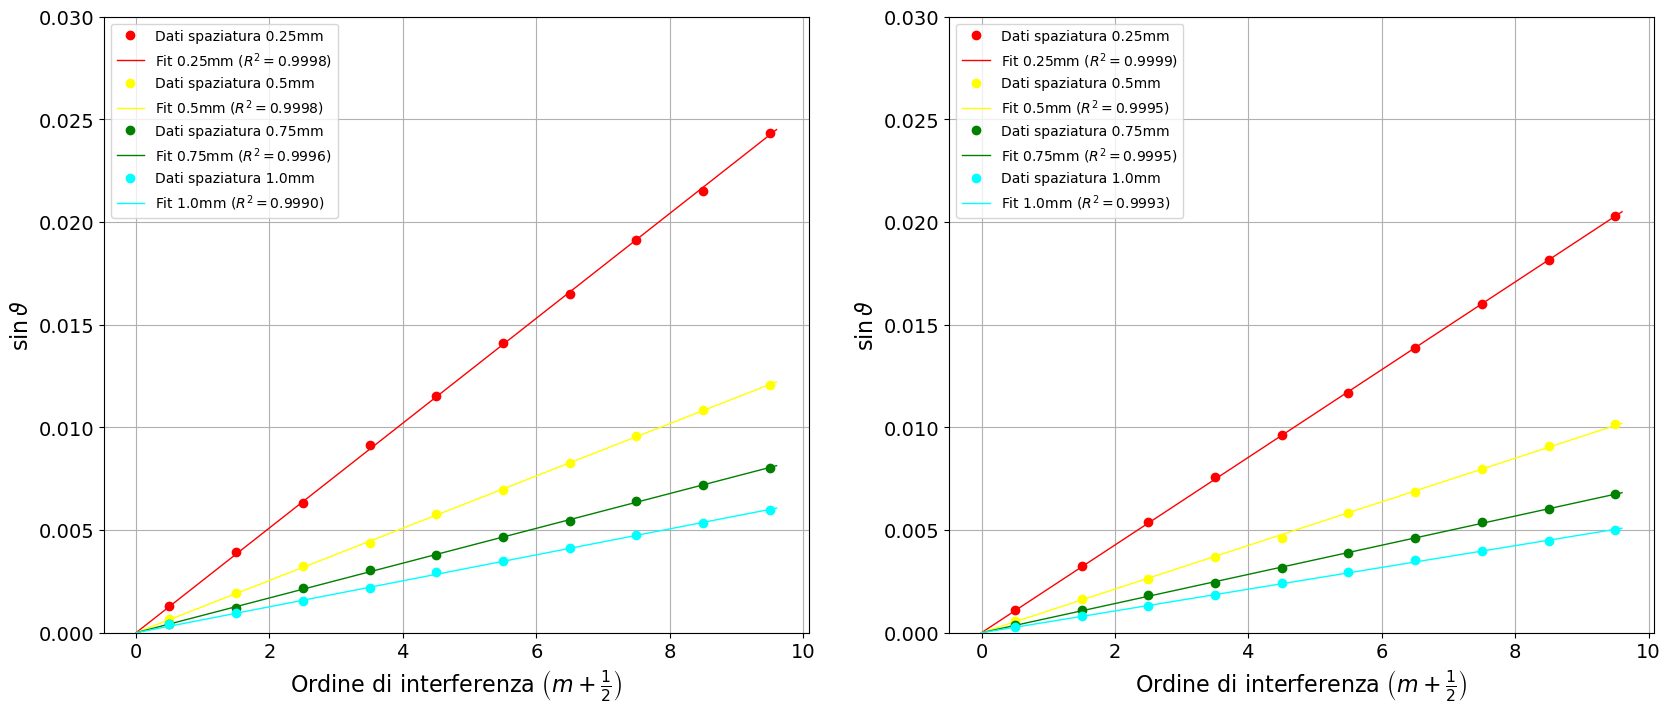

In [137]:
# NOTA: le lunghezze d'onda (lambda) e le distanze delle fenditure dal muro (r) sono già fissate dalla parte 1

# Lettura dati da csv
data_rosso = pd.read_csv(rad + "data/2fend_dvar_rosso.csv")
data_verde = pd.read_csv(rad + "data/2fend_dvar_verde.csv")

p = data_rosso["p"].to_numpy()
m = data_rosso["m"].to_numpy()

# dati relativi alle distanze dei minimi dovuti alla diffrazione, si indicano con dist_p
dist_p_rosso = data_rosso["dist_p"].to_numpy()
dist_p_verde = data_verde["dist_p"].to_numpy()

# dati relativi alle distanze dei minimi dovuti all'interferenza, si indicano con dist_m
dist_m_rosso = data_rosso[["dist_m_1", "dist_m_2", "dist_m_3", "dist_m_4"]].T.values
dist_m_verde = data_verde[["dist_m_1", "dist_m_2", "dist_m_3", "dist_m_4"]].T.values

# Si fanno di seguito i calcoli per ottenere il seno
sin_m_rosso = np.sin( np.arctan( (dist_m_rosso/2) / r_rosso) )
sin_m_verde = np.sin( np.arctan( (dist_m_verde/2) / r_verde) )
sin_p_rosso = np.sin( np.arctan( (dist_p_rosso/2) / r_rosso) )
sin_p_verde = np.sin( np.arctan( (dist_p_verde/2) / r_verde) )


# Si definiscono i vettori per salvare i risultati del fit, sono della forma
# Essendo che d è fisso, sarà salvato in un solo vettore, mentre b, che varia, sarà salvato in matrici
# [b, std_dev di b, R^2] per ogni fenditura
# Si raggruppano in matrici in base al colore del laser
b_fit_rosso = np.zeros(3)
b_fit_verde = np.zeros(3)
d_fit_rosso = np.zeros((4,3))
d_fit_verde = np.zeros((4,3))


# Si effettua ora il fit lineare per il parametro b, sia in caso di laser rosso che laser verde

# Caso rosso
# dato che la lunghezza d'onda è fissata, similmente a quanto fatto in altre relazioni, si usa una lambda function
popt, pcov = sop.curve_fit(lambda p, b: diffr(p, b, lambda_rosso), p, sin_p_rosso)
b = popt[0]
ndata = len(sin_p_rosso)
# Si calcola la deviazione standard
sigma = np.sqrt(ndata*np.diag(pcov))
r_sq = r_squared(sin_p_rosso, diffr(p, b, lambda_rosso))
# Salvataggio dei risultati di fit
b_fit_rosso = np.array([b, sigma[0], r_sq])

# Caso verde (la procedura è identica a sopra, quindi si tolgono i commenti e si snellisce il codice
popt, pcov = sop.curve_fit(lambda p, b: diffr(p, b, lambda_verde), p, sin_p_verde)
b = popt[0]
sigma = np.sqrt(len(sin_p_verde)*np.diag(pcov))
r_sq = r_squared(sin_p_verde, diffr(p, b, lambda_verde))
b_fit_verde = np.array([b, sigma[0], r_sq])

# Si fanno una tabella e un plot per riassumere questi primi risultati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,5])

ax1.set_title("Fit di b, doppia fenditura (b fisso)", size=titlefontsize)
ax1.axis('tight')
ax1.axis('off')
rows = ["Ottenuto (mm)", "Previsto (mm)"]
cols = ["Rosso", "Verde"]
table_data = [
    ["{:.3f}".format(arr[0]) + r"$\pm$" + "{:.4f}".format(arr[1]) for arr in [b_fit_rosso[0:2], b_fit_verde[0:2]]],
    [0.15, 0.15]
]
table = ax1.table(cellText=table_data, rowLabels=rows, colLabels=cols, loc='center')
table.set_fontsize(14)
table.scale(0.7, 2)

p_fit = np.arange(0.,10.2,0.2)
ax2.plot(p, sin_p_rosso, 'o', markersize=markersize, color="red", label="Laser rosso")
ax2.plot(p_fit, diffr(p_fit, b_fit_rosso[0], lambda_rosso), linewidth=linewidth, color="red", label="Fit d rosso ($R^2=${:.4f})".format(b_fit_rosso[2]) )
ax2.plot(p, sin_p_verde, 'o', markersize=markersize, color="green", label="Laser verde")
ax2.plot(p_fit, diffr(p_fit, b_fit_verde[0], lambda_verde), linewidth=linewidth, color="green", label="Fit d verde ($R^2=${:.4f})".format(b_fit_verde[2]) )
ax2.set_xlabel(r'Ordine di diffrazione $p$', size=labelfontsize)
ax2.set_ylabel(r'$\sin\vartheta$', size=labelfontsize)
ax2.tick_params(labelsize=tickfontsize)
ax2.grid(True)
ax2.legend()


# Si passa ora a fare i fit per i valori di d
# Essendo la procedura molto simile a ciò fatto nella parte 1, si utilizzeranno meno commenti al fine di snellire il codice e renderlo più compatto
for index, sin_vec in enumerate(sin_m_rosso):
    # Fit lineare per b
    popt, pcov = sop.curve_fit(lambda m, d: interf(m, d, lambda_rosso), m, sin_vec)
    d = popt[0]
    sigma = np.sqrt(len(sin_vec)*np.diag(pcov))
    r_sq = r_squared(sin_vec, interf(m, d, lambda_rosso))
    d_fit_rosso[index] = np.array([d, sigma[0], r_sq])

for index, sin_vec in enumerate(sin_m_verde):
    popt, pcov = sop.curve_fit(lambda m, d: interf(m, d, lambda_verde), m, sin_vec)
    d = popt[0]
    sigma = np.sqrt(len(sin_vec)*np.diag(pcov))
    r_sq = r_squared(sin_vec, interf(m, d, lambda_verde))
    d_fit_verde[index] = np.array([d, sigma[0], r_sq])

# Si definiscono i vettori delle larghezze previste e dei colori da utilizzare
previsto = [0.25, 0.50, 0.75, 1.00]
colors = ["red", "yellow", "green", "cyan"]

fig, axs = plt.subplots(1, 2, figsize=[20,2])

axs[0].set_title("Fit di d laser rosso, doppia fenditura (d variabile)", size=titlefontsize, loc="left")
axs[0].axis('tight')
axs[0].axis('off')
rows = ["Ottenuto (mm)", "Previsto (mm)"]
table_data = [
    ["{:.3f}".format(arr[0]) + r"$\pm$" + "{:.3f}".format(arr[1]) for arr in d_fit_rosso],
    previsto
]
table = axs[0].table(cellText=table_data, rowLabels=rows, loc='center')
table.set_fontsize(14)
table.scale(0.9, 2)

axs[1].set_title("Fit di d laser verde, doppia fenditura (d variabile)", size=titlefontsize, loc="left")
axs[1].axis('tight')
axs[1].axis('off')
rows = ["Ottenuto (mm)", "Previsto (mm)"]
table_data = [
    ["{:.3f}".format(arr[0]) + r"$\pm$" + "{:.3f}".format(arr[1]) for arr in d_fit_verde],
    previsto
]
table = axs[1].table(cellText=table_data, rowLabels=rows, loc='center')
table.set_fontsize(14)
table.scale(0.9, 2)

fig2, axs2 = plt.subplots(1, 2, figsize=[20,8])
m_fit = np.arange(0., 9.7, 0.2)
for index, sin_vec in enumerate(sin_m_rosso):
    axs2[0].plot(m, sin_vec, 'o', markersize=markersize, label="Dati spaziatura "+str(previsto[index])+"mm", color=colors[index])
    axs2[0].plot(m_fit, interf(m_fit, d_fit_rosso[index, 0], lambda_rosso), linewidth=linewidth, label="Fit "+str(previsto[index])+"mm"+" ($R^2=${:.4f})".format(d_fit_rosso[index, 2]), color=colors[index])

axs2[0].set_xlabel(r'Ordine di interferenza $\left(m+\frac{1}{2}\right)$', size=labelfontsize)
axs2[0].set_ylabel(r'$\sin\vartheta$', size=labelfontsize)
axs2[0].set_ylim(0.,0.03)
axs2[0].tick_params(labelsize=tickfontsize)
axs2[0].grid(True)
axs2[0].legend()

for index, sin_vec in enumerate(sin_m_verde):
    axs2[1].plot(m, sin_vec, 'o', markersize=markersize, label="Dati spaziatura "+str(previsto[index])+"mm", color=colors[index])
    axs2[1].plot(m_fit, interf(m_fit, d_fit_verde[index, 0], lambda_verde), linewidth=linewidth, label="Fit "+str(previsto[index])+"mm"+" ($R^2=${:.4f})".format(d_fit_verde[index, 2]), color=colors[index])

axs2[1].set_xlabel(r'Ordine di interferenza $\left(m+\frac{1}{2}\right)$', size=labelfontsize)
axs2[1].set_ylabel(r'$\sin\vartheta$', size=labelfontsize)
axs2[1].set_ylim(0.,0.03)
axs2[1].tick_params(labelsize=tickfontsize)
axs2[1].grid(True)
axs2[1].legend();

Dalla tabella si può notare che la stima di $b$ non è in accordo con il valore atteso: ciò è dovuto al fatto che, in particolare nelle misure con questo set di doppie fenditure, i minimi di diffrazione erano molto poco visibili. Ciò ha portato a errori sulla misura data l'impossibilità di determinare con precisione la posizione del minimo.

Per quanto riguarda le stime dei valori di $d$, invece, l'accordo è ottimo.